In [50]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [51]:
df = pd.read_csv('acting_credits.csv')
df.head()

,odid,display_name,billing,person,character,type
0,10100,Titanic,1.0,Leonardo DiCaprio,Jack Dawson,Leading
1,10100,Titanic,2.0,Kate Winslet,Rose DeWitt Bukater,Leading
2,10100,Titanic,3.0,Billy Zane,Cal Hockley,Supporting
3,10100,Titanic,4.0,Kathy Bates,Molly Brown,Supporting
4,10100,Titanic,5.0,Frances Fisher,Ruth DeWitt Bukater,Supporting


In [52]:
id_ = ['10100']
#Grab DataFrame rows where column has certain values
ab=df[df.odid.isin(id_)]
ab

,odid,display_name,billing,person,character,type
0,10100,Titanic,1.0,Leonardo DiCaprio,Jack Dawson,Leading
1,10100,Titanic,2.0,Kate Winslet,Rose DeWitt Bukater,Leading
2,10100,Titanic,3.0,Billy Zane,Cal Hockley,Supporting
3,10100,Titanic,4.0,Kathy Bates,Molly Brown,Supporting
4,10100,Titanic,5.0,Frances Fisher,Ruth DeWitt Bukater,Supporting
5,10100,Titanic,6.0,Gloria Stuart,Old Rose,Supporting
6,10100,Titanic,7.0,Bill Paxton,Brock Lovett,Supporting
7,10100,Titanic,8.0,Bernard Hill,Capt. Edward J. Smith,Supporting
8,10100,Titanic,9.0,Jonathan Hyde,J. Bruce Ismay,Supporting
9,10100,Titanic,10.0,Victor Garber,Thomas Andrews,Supporting


In [53]:
ab = ab[ab.type == 'Leading']

In [39]:
ab= ab[ab["type"] != 'Supporting']

In [54]:
ab

,odid,display_name,billing,person,character,type
0,10100,Titanic,1.0,Leonardo DiCaprio,Jack Dawson,Leading
1,10100,Titanic,2.0,Kate Winslet,Rose DeWitt Bukater,Leading


In [19]:
american[df.display_name == 'Titanic']

TypeError: string indices must be integers, not Series

In [15]:
american

'10100'

###### Now let's do some cleaning and filtering process, for here, we have some columns with numbers and some with characters. We will remove the columns with words in order to better analyze and do regressions in the future. 

In [3]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df.columns.difference(str_list)       

In [4]:
df_num = df[num_list]
#del movie # Get rid of movie df as we won't need it now
df_num.head()

,box_office,domestic_bluray_spending,domestic_bluray_units,domestic_box_office,domestic_dvd_spending,domestic_dvd_units,inflation_adjusted_domestic_box_office,international_box_office,maximum_theaters,odid,opening_weekend_revenue,opening_weekend_theaters,production_budget,production_year,running_time,sequel,theatrical_engagements
0,2.696292e+09,NaN,NaN,658672302.0,NaN,NaN,1.147349e+09,1.548943e+09,3265,10100,28638131,2674,200000000,1997,194.0,0.0,87202
1,1.095627e+09,33598926.0,2615544.0,533345358.0,282361481.0,19555100.0,6.260806e+08,4.695460e+08,4366,20100,158411483,4366,185000000,2008,152.0,1.0,39170
2,1.710912e+09,3411838.0,200150.0,460998007.0,25237983.0,935568.0,1.385312e+09,3.256000e+08,2375,30100,1554475,43,11000000,1977,119.0,0.0,43684
3,1.094741e+09,NaN,NaN,441226247.0,NaN,NaN,5.989593e+08,4.957819e+08,4223,40100,108037878,4163,70000000,2004,92.0,1.0,33603
4,1.491031e+09,NaN,NaN,435110554.0,NaN,NaN,1.133176e+09,3.578548e+08,3010,50100,11911430,1101,10500000,1982,114.0,0.0,62065


In [5]:
df_num = df_num.fillna(value=0, axis=1)

In [6]:
df_num

,box_office,domestic_bluray_spending,domestic_bluray_units,domestic_box_office,domestic_dvd_spending,domestic_dvd_units,inflation_adjusted_domestic_box_office,international_box_office,maximum_theaters,odid,opening_weekend_revenue,opening_weekend_theaters,production_budget,production_year,running_time,sequel,theatrical_engagements
0,2.696292e+09,0.0,0.0,658672302.0,0.0,0.0,1.147349e+09,1.548943e+09,3265,10100,28638131,2674,200000000,1997,194.0,0.0,87202
1,1.095627e+09,33598926.0,2615544.0,533345358.0,282361481.0,19555100.0,6.260806e+08,4.695460e+08,4366,20100,158411483,4366,185000000,2008,152.0,1.0,39170
2,1.710912e+09,3411838.0,200150.0,460998007.0,25237983.0,935568.0,1.385312e+09,3.256000e+08,2375,30100,1554475,43,11000000,1977,119.0,0.0,43684
3,1.094741e+09,0.0,0.0,441226247.0,0.0,0.0,5.989593e+08,4.957819e+08,4223,40100,108037878,4163,70000000,2004,92.0,1.0,33603
4,1.491031e+09,0.0,0.0,435110554.0,0.0,0.0,1.133176e+09,3.578548e+08,3010,50100,11911430,1101,10500000,1982,114.0,0.0,62065
5,1.313830e+09,0.0,0.0,474544677.0,0.0,0.0,7.613297e+08,5.525000e+08,3126,60100,64810970,2970,115000000,1999,133.0,1.0,47092
6,1.187717e+09,2601322.0,152089.0,423315812.0,320862849.0,19874760.0,5.448171e+08,6.429000e+08,4133,70100,135634554,4133,225000000,2006,151.0,1.0,34395
7,1.003756e+09,0.0,0.0,403706375.0,0.0,0.0,5.857564e+08,4.180000e+08,3876,80100,114844116,3615,139000000,2002,121.0,0.0,31297
8,8.863816e+08,50109509.0,2383426.0,402111870.0,221996361.0,11099008.0,4.519737e+08,4.344078e+08,4293,90100,108966307,4234,210000000,2009,149.0,1.0,28686
9,9.688345e+08,0.0,0.0,380270577.0,0.0,0.0,5.001062e+08,4.687283e+08,3663,100100,108435841,3661,115000000,2005,139.0,1.0,26895


In [7]:
df_num.to_csv('out.csv', sep=',')

###### Now let's look at some correlations between some variables we are interested in. 

In [8]:
X = df_num.values
# Data Normalization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

###### hexbin is an axes method or pyplot function that is essentially a pcolor of a 2-D histogram with hexagonal cells. It can be much more informative than a scatter plot

KeyError: 'duration'

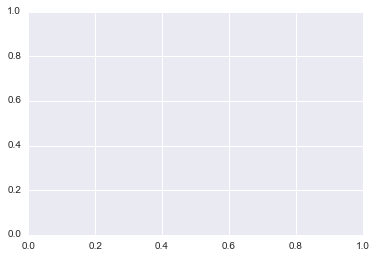

In [7]:
df.plot(y= 'imdb_score', x ='duration',kind='hexbin',gridsize=45, sharex=False, colormap='cubehelix', title='Hexbin of Imdb_Score and Duration')
df.plot(y= 'imdb_score', x ='gross',kind='hexbin',gridsize=45, sharex=False, colormap='cubehelix', title='Hexbin of Imdb_Score and Gross')
df.plot(y= 'imdb_score', x ='budget',kind='hexbin',gridsize=35, sharex=False, colormap='cubehelix', title='Hexbin of Imdb_Score and Budget')
df.plot(y= 'gross', x ='duration',kind='hexbin',gridsize=35, sharex=False, colormap='cubehelix', title='Hexbin of Gross and Duration')

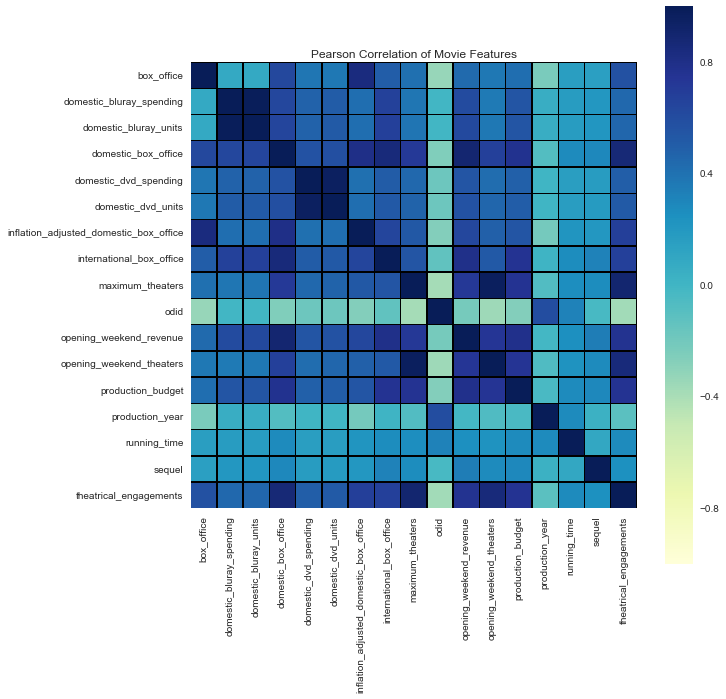

In [10]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
plt.title('Pearson Correlation of Movie Features')
# Draw the heatmap using seaborn
sns.heatmap(df_num.astype(float).corr(),linewidths=0.4,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black')

In [8]:
# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

###### Now having obtained the eigenvalues and eigenvectors, we will group them together by creating a list of eigenvalue, eigenvector tuples (immutable Python data objects). Following on from this we will sort the list in order of Highest eigenvalue to lowest eigenvalue and then use the eigenvalues to calculate both the individual explained variance and the cumulative explained variance for visualisation.

In [10]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

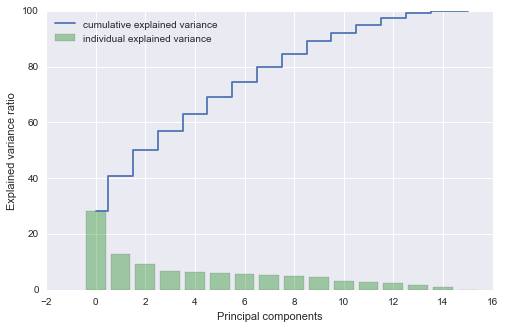

In [11]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(8, 5))
plt.bar(range(16), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(16), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

###### From the plot above, it can be seen that approximately 90% of the variance can be explained with the 9 principal components. Therefore for the purposes of this notebook, let's implement PCA with 9 components ( although to ensure that we are not excluding useful information, one should really go for 95% or greater variance level which corresponds to about 12 components).

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=9)
x_9d = pca.fit_transform(X_std)

In [14]:
from sklearn.cluster import KMeans

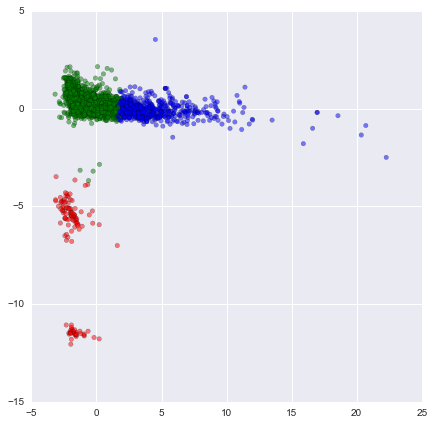

In [19]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_9d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,2], c= label_color, alpha=0.5) 
plt.show()

In [11]:
# imports
import h2o 
import numpy as np
import pandas as pd
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

In [12]:
# display matplotlib graphics in notebook
%matplotlib inline

In [13]:
# start and connect to h2o server
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 hour 50 mins
H2O cluster version:,3.10.4.4
H2O cluster version age:,11 days
H2O cluster name:,H2O_from_python_yataolu_5depvx
H2O cluster total nodes:,1
H2O cluster free memory:,1.717 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [14]:
h2o.remove_all()

In [15]:
path = '/Users/yataolu/Desktop/datamining/movie_summary2.csv'

In [16]:
frame = h2o.import_file(path=path) # multi-threaded import

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [17]:
frame.describe()

Rows:13821
Cols:24




,odid,display_name,od_name,production_year,running_time,sequel,distributor,opening_weekend_revenue,opening_weekend_theaters,maximum_theaters,theatrical_engagements,domestic_dvd_units,domestic_dvd_spending,domestic_bluray_units,domestic_bluray_spending,creative_type,source,production_method,genre,production_budget,domestic_box_office,international_box_office,inflation_adjusted_domestic_box_office,box_office
type,int,string,string,int,int,int,enum,int,int,int,int,int,int,int,int,enum,enum,enum,enum,int,int,int,int,int
mins,10100.0,NaN,NaN,1902.0,0.0,0.0,,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,,,,,0.0,0.0,0.0,0.0,0.0
mean,140514717.611,NaN,NaN,2007.91852977,47.9310469575,0.0460892844223,,3842293.90153,523.754576369,584.570074524,3010.24708776,1036447.06631,3101414.38673,37044.7099342,797429.314304,,,,,10551964.3827,14249403.4378,18761885.1654,19537842.8023,21592259.2858
maxs,285390100.0,NaN,NaN,2017.0,980.0,1.0,,247966675.0,4468.0,4468.0,87202.0,22997252.0,541618013.0,7461601.0,161970182.0,,,,,425000000.0,936662225.0,2023411357.0,3926220158.0,4118064880.0
sigma,84441440.0694,NaN,NaN,8.3385504078,55.9030606639,0.209686059497,,12601252.0344,1079.70302838,1103.25172466,6563.91902527,1962374.57766,15940446.181,246060.230367,5443336.63691,,,,,28595299.9661,43671665.6042,69552157.1648,72358665.1282,99278911.8815
zeros,0,0,0,0,7544,13184,,3862,3869,2851,3042,0,11198,12071,12083,,,,,9740,2741,5779,2741,7579
missing,0,0,0,0,0,0,3319,0,0,0,0,11197,0,0,0,2357,2015,1712,1544,0,0,0,0,0
0,10100.0,Titanic,Titanic,1997.0,194.0,0.0,Paramount Pictures,28638131.0,2674.0,3265.0,87202.0,nan,0.0,0.0,0.0,Historical Fiction,Original Screenplay,Live Action,Thriller/Suspense,200000000.0,658672302.0,1548943366.0,1147349023.0,2696292389.0
1,20100.0,The Dark Knight,Dark Knight The,2008.0,152.0,1.0,Warner Bros.,158411483.0,4366.0,4366.0,39170.0,19555100.0,282361481.0,2615544.0,33598926.0,Super Hero,Based on Comic/Graphic Novel,Live Action,Action,185000000.0,533345358.0,469546000.0,626080555.0,1095626555.0
2,30100.0,Star Wars Ep. IV: A New Hope,Star Wars Ep IV A New Hope,1977.0,119.0,0.0,20th Century Fox,1554475.0,43.0,2375.0,43684.0,935568.0,25237983.0,200150.0,3411838.0,Science Fiction,Original Screenplay,Live Action,Adventure,11000000.0,460998007.0,325600000.0,1385311974.0,1710911974.0


In [18]:
# split into 40% training, 30% validation, and 30% test
train, valid, test = frame.split_frame([0.4, 0.3])

In [19]:
# assign target and inputs
y = 'box_office'
X = [name for name in frame.columns if name not in ['odid', '_WARN_', y]]
print(y)
print(X)

box_office
[u'display_name', u'od_name', u'production_year', u'running_time', u'sequel', u'distributor', u'opening_weekend_revenue', u'opening_weekend_theaters', u'maximum_theaters', u'theatrical_engagements', u'domestic_dvd_units', u'domestic_dvd_spending', u'domestic_bluray_units', u'domestic_bluray_spending', u'creative_type', u'source', u'production_method', u'genre', u'production_budget', u'domestic_box_office', u'international_box_office', u'inflation_adjusted_domestic_box_office']


In [33]:
# assign target and inputs
y = 'box_office'
X = [name for name in frame.columns if name not in ['odid', '_WARN_','domestic_box_office','international_box_office','inflation_adjusted_domestic_box_office', y]]
print(y)
print(X)

box_office
[u'display_name', u'od_name', u'production_year', u'running_time', u'sequel', u'distributor', u'opening_weekend_revenue', u'opening_weekend_theaters', u'maximum_theaters', u'theatrical_engagements', u'domestic_dvd_units', u'domestic_dvd_spending', u'domestic_bluray_units', u'domestic_bluray_spending', u'creative_type', u'source', u'production_method', u'genre', u'production_budget']


In [35]:
# assign target and inputs
y = 'box_office'
X = [name for name in frame.columns if name not in ['odid', '_WARN_','domestic_box_office', y]]
print(y)
print(X)

box_office
[u'display_name', u'od_name', u'production_year', u'running_time', u'sequel', u'distributor', u'opening_weekend_revenue', u'opening_weekend_theaters', u'maximum_theaters', u'theatrical_engagements', u'domestic_dvd_units', u'domestic_dvd_spending', u'domestic_bluray_units', u'domestic_bluray_spending', u'creative_type', u'source', u'production_method', u'genre', u'production_budget', u'international_box_office', u'inflation_adjusted_domestic_box_office']


In [36]:
# random forest

# initialize rf model
rf_model = H2ORandomForestEstimator(
    ntrees=500,                      # Up to 500 decision trees in the forest 
    max_depth=30,                    # trees can grow to depth of 30
    stopping_rounds=5,               # stop after validation error does not decrease for 5 iterations/new trees
    score_each_iteration=True,       # score validation error on every iteration/new tree
    model_id='rf_model')             # for easy lookup in flow


In [37]:
# train rf model
rf_model.train(
    x=X,
    y=y,
    training_frame=train,
    validation_frame=valid)

# print model information
rf_model

# view detailed results at http://localhost:54321/flow/index.html

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_model


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 3.45545947443e+15
RMSE: 58783156.3837
MAE: 7883984.46351
RMSLE: 5.15267457693
Mean Residual Deviance: 3.45545947443e+15

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 9.08120012967e+14
RMSE: 30135029.6659
MAE: 6593288.65878
RMSLE: 5.95501825259
Mean Residual Deviance: 9.08120012967e+14
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-04-27 03:39:09,0.001 sec,0.0,nan,nan,nan,nan,nan,nan
,2017-04-27 03:39:09,0.062 sec,1.0,45720616.0828000,7817713.2947100,2090374734990000.0000000,43931779.6470000,8812246.0454900,1930001262950000.0000000
,2017-04-27 03:39:09,0.158 sec,2.0,41098758.0925000,7460980.5958600,1689107916750000.0000000,39561353.1600000,7955814.2135300,1565100663850000.0000000
,2017-04-27 03:39:09,0.250 sec,3.0,37453406.0860000,6836560.0409000,1402757627440000.0000000,39845418.0739000,7420810.1678100,1587657341490000.0000000
,2017-04-27 03:39:09,0.308 sec,4.0,49984581.1362000,8140915.3604200,2498458351360000.0000000,36679547.0453000,7326518.2584600,1345389171450000.0000000
---,---,---,---,---,---,---,---,---,---
,2017-04-27 03:39:10,1.063 sec,16.0,62063914.7878000,8191674.2572100,3851929518790000.0000000,30617241.6743000,6675009.8300700,937415487740000.0000000
,2017-04-27 03:39:10,1.131 sec,17.0,62544713.9580000,8095426.8779400,3911841244090000.0000000,29830652.4330000,6559874.8887800,889867824576000.0000000
,2017-04-27 03:39:10,1.201 sec,18.0,61942859.1377000,8043732.7790400,3836917798160000.0000000,29775424.8074000,6537199.7832500,886575922460000.0000000
,2017-04-27 03:39:10,1.268 sec,19.0,59931127.4537000,7967834.0774500,3591740037870000.0000000,30067567.7816000,6615386.1987400,904058632302000.0000000



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
inflation_adjusted_domestic_box_office,288433530715999993856.0000000,1.0,0.3498801
theatrical_engagements,122135739530000007168.0000000,0.4234450,0.1481550
production_year,103769734795000004608.0000000,0.3597700,0.1258764
international_box_office,93606025229199998976.0000000,0.3245324,0.1135474
running_time,43298024632000004096.0000000,0.1501144,0.0525220
maximum_theaters,32683880337100001280.0000000,0.1133151,0.0396467
distributor,25517107416599998464.0000000,0.0884679,0.0309532
opening_weekend_revenue,23364525333199998976.0000000,0.0810049,0.0283420
domestic_dvd_units,22539465001899999232.0000000,0.0781444,0.0273412
production_budget,15542369815299999744.0000000,0.0538854,0.0188534


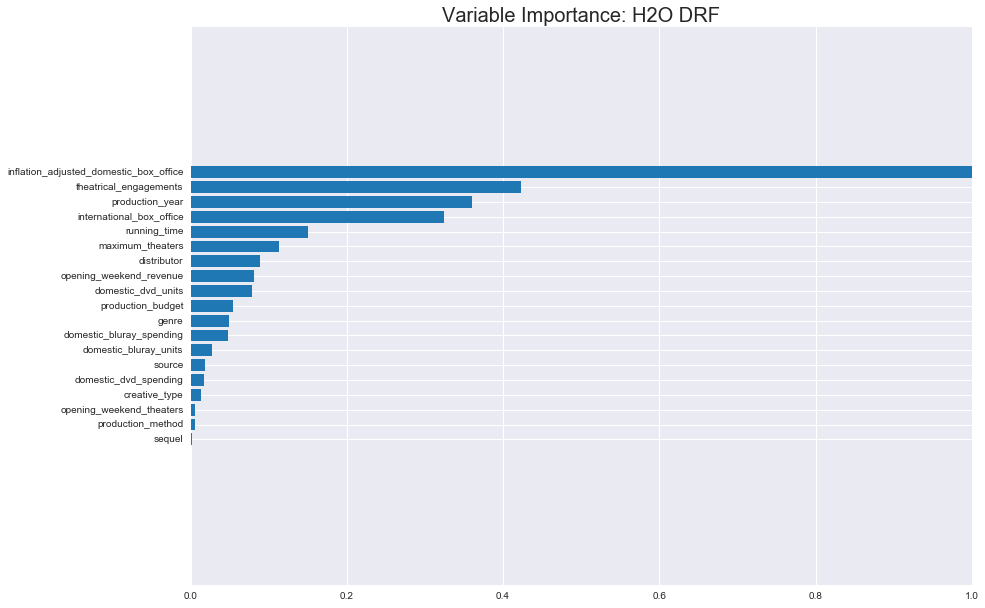

In [38]:
rf_model.varimp_plot(num_of_features=27)

In [40]:
rf_predictions = rf_model.predict(test[:-1])

drf prediction progress: |████████████████████████████████████████████████| 100%


In [39]:
print(rf_model.model_performance(test_data=test).r2())
print(rf_model.model_performance(test_data=test).mse())

0.764562795165
2.10591691572e+15


In [41]:
test=test.cbind(rf_predictions)
test.head()

odid,display_name,od_name,production_year,running_time,sequel,distributor,opening_weekend_revenue,opening_weekend_theaters,maximum_theaters,theatrical_engagements,domestic_dvd_units,domestic_dvd_spending,domestic_bluray_units,domestic_bluray_spending,creative_type,source,production_method,genre,production_budget,domestic_box_office,international_box_office,inflation_adjusted_domestic_box_office,box_office,predict,predict0
30100,Star Wars Ep. IV: A New Hope,Star Wars Ep IV A New Hope,1977,119,0,20th Century Fox,1.55448e+06,43,2375,43684,935568,2.5238e+07,200150,3.41184e+06,Science Fiction,Original Screenplay,Live Action,Adventure,1.1e+07,4.60998e+08,3.256e+08,1.38531e+09,1.71091e+09,1.10512e+09,1.11255e+09
60100,Star Wars Ep. I: The Phantom Menace,Star Wars Ep I The Phantom Menace,1999,133,1,20th Century Fox,6.4811e+07,2970,3126,47092,nan,0,0,0,Science Fiction,Original Screenplay,Animation/Live Action,Adventure,1.15e+08,4.74545e+08,5.525e+08,7.6133e+08,1.31383e+09,9.47969e+08,8.98528e+08
110100,The Lord of the Rings: The Return of the King,Lord of the Rings The Return of the King The,2003,201,1,New Line,7.26297e+07,3703,3703,35419,nan,0,0,0,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,9.4e+07,3.77846e+08,7.63557e+08,5.24449e+08,1.28801e+09,1.50557e+09,1.27944e+09
120100,Spider-Man 2,Spider Man 2,2004,127,1,Sony Pictures,8.81562e+07,4152,4166,29417,3.32326e+06,3.14212e+07,44206,1.20016e+06,Super Hero,Based on Comic/Graphic Novel,Live Action,Adventure,2e+08,3.73524e+08,4.10181e+08,5.07055e+08,9.17235e+08,9.94336e+08,7.98667e+08
150100,The Lord of the Rings: The Two Towers,Lord of the Rings The Two Towers The,2002,179,1,New Line,6.20075e+07,3622,3622,32379,nan,0,0,0,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,9.4e+07,3.42549e+08,5.92151e+08,4.92516e+08,1.08467e+09,8.96162e+08,8.27692e+08
170100,Spider-Man 3,Spider Man 3,2007,139,1,Sony Pictures,1.51117e+08,4252,4324,27819,7.78558e+06,1.25013e+08,44360,752966,Super Hero,Based on Comic/Graphic Novel,Live Action,Adventure,2.58e+08,3.3653e+08,5.54345e+08,4.12347e+08,9.66692e+08,7.11741e+08,8.34812e+08
190100,The Lion King,Lion King The,1994,87,0,Walt Disney,1.58675e+06,2,2624,59212,3.88165e+06,9.32034e+07,2.93666e+06,8.7951e+07,Kids Fiction,Original Screenplay,Hand Animation,Adventure,7.93e+07,4.2278e+08,5.647e+08,7.61641e+08,1.32634e+09,7.71718e+08,6.12191e+08
210100,Transformers,Transformers The,2007,142,0,Paramount Pictures,7.05024e+07,4011,4050,25816,1.71528e+07,2.95031e+08,438140,7.96531e+06,Science Fiction,Based on TV,Animation/Live Action,Action,1.51e+08,3.19246e+08,3.89026e+08,3.91169e+08,7.80196e+08,6.96305e+08,7.23398e+08
230100,Harry Potter and the Sorcerer���s Stone,Harry Potter and the Sorcerers Stone,2001,152,0,Warner Bros.,9.02946e+07,3672,3672,36120,nan,0,0,0,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,1.25e+08,3.17576e+08,6.5718e+08,4.72337e+08,1.12952e+09,8.93293e+08,8.30062e+08
260100,Star Wars Ep. II: Attack of the Clones,Star Wars Ep II Attack of the Clones,2002,143,1,20th Century Fox,8.00278e+07,3161,3161,24854,nan,0,0,0,Science Fiction,Original Screenplay,Animation/Live Action,Adventure,1.15e+08,3.10677e+08,3.46019e+08,4.50775e+08,7.96794e+08,8.12082e+08,6.92155e+08


In [42]:
test_df=test.as_data_frame()

In [43]:
result = test_df.sort_values(['predict'],ascending=False)

In [44]:
result1 = result.reset_index(drop= True)
result1.head()

,odid,display_name,od_name,production_year,running_time,sequel,distributor,opening_weekend_revenue,opening_weekend_theaters,maximum_theaters,...,source,production_method,genre,production_budget,domestic_box_office,international_box_office,inflation_adjusted_domestic_box_office,box_office,predict,predict0
0,110100,The Lord of the Rings: The Return of the King,Lord of the Rings The Return of the King The,2003,201,1,New Line,72629713,3703,3703,...,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,94000000,377845905,763557436,524448846,1288006282,1.505568e+09,1.279439e+09
1,6640100,Ben-Hur,Ben Hur (1959),1959,0,0,MGM,0,0,0,...,Based on Religious Text,Live Action,Adventure,15000000,73000000,0,1206647051,1206647051,1.252266e+09,8.172285e+08
2,730100,King Kong,King Kong (2005),2005,189,0,Universal,50130145,3568,3627,...,Remake,Animation/Live Action,Adventure,207000000,218080025,332437332,285410607,617847939,1.131282e+09,8.351054e+08
3,30100,Star Wars Ep. IV: A New Hope,Star Wars Ep IV A New Hope,1977,119,0,20th Century Fox,1554475,43,2375,...,Original Screenplay,Live Action,Adventure,11000000,460998007,325600000,1385311974,1710911974,1.105122e+09,1.112545e+09
4,122040100,Avatar,Avatar,2009,162,0,20th Century Fox,77025481,3452,3461,...,Original Screenplay,Animation/Live Action,Action,425000000,760507625,2023411357,832120706,0,1.045329e+09,7.670442e+08


In [45]:
newdf = result1[result1.columns[23:25]]

In [46]:
newdf

,box_office,predict
0,1288006282,1.505568e+09
1,1206647051,1.252266e+09
2,617847939,1.131282e+09
3,1710911974,1.105122e+09
4,0,1.045329e+09
5,917235490,9.943356e+08
6,1313829663,9.479693e+08
7,1084666768,8.961619e+08
8,1129516337,8.932931e+08
9,850638098,8.170956e+08


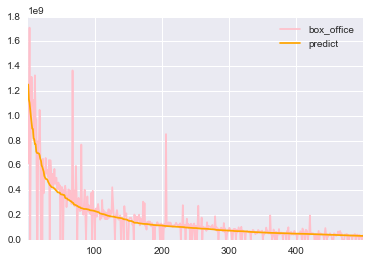

In [49]:
newdf[1:500].plot(color=['pink','orange'])

In [48]:
# GBM with random hyperparameter search
# train many different GBM models with random hyperparameters
# and select best model based on validation error

# define random grid search parameters
hyper_parameters = {'ntrees':list(range(0, 500, 50)),
                    'max_depth':list(range(0, 20, 2)),
                    'sample_rate':[s/float(10) for s in range(1, 11)],
                    'col_sample_rate':[s/float(10) for s in range(1, 11)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':600}

# initialize grid search
gsearch = H2OGridSearch(H2OGradientBoostingEstimator,
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
gsearch.train(x=X,
              y=y,
              training_frame=train,
              validation_frame=valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [74]:
# show grid search results
gsearch.show()

# select best model
gbm_model = gsearch.get_grid()[0]

# print model information
gbm_model

     col_sample_rate max_depth ntrees sample_rate  \
0                0.6        18    150         0.6   
1                0.1        16    200         0.6   
2                0.3         6    150         0.4   
3                0.8        14    350         0.7   
4                0.1         8    150         0.7   
5                0.8         2    100         0.8   
6                0.4         8     50         0.5   
7                1.0         6    100         0.4   
8                0.7        12    200         0.3   
9                0.7        16    250         0.4   
10               0.3         4    400         0.2   
11               1.0        16    250         0.7   
12               0.6         2    450         0.3   
13               0.2        10     50         0.4   

                                                        model_ids  \
0   Grid_GBM_py_15_sid_99e1_model_python_1493271435467_1_model_14   
1   Grid_GBM_py_15_sid_99e1_model_python_1493271435467_1_model_11 

,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-04-27 01:58:49,38.372 sec,0.0,144255038.4520000,69064140.8971000,20809516118800000.0000000,147516400.4190000,67480593.4298000,21761088392500000.0000000
,2017-04-27 01:58:49,38.388 sec,1.0,133360724.9230000,62561341.7753000,17785082951900000.0000000,138576501.1410000,60977013.4463000,19203446668600000.0000000
,2017-04-27 01:58:49,38.404 sec,2.0,123916279.1070000,56838664.4506000,15355244227700000.0000000,131623702.8510000,55209176.4383000,17324799152100000.0000000
,2017-04-27 01:58:49,38.426 sec,3.0,115591350.6840000,51654580.4222000,13361360352900000.0000000,125236903.7660000,49856312.5594000,15684282065000000.0000000
,2017-04-27 01:58:49,38.448 sec,4.0,108458179.5210000,47117058.8082000,11763176704900000.0000000,120399103.3850000,45463802.8363000,14495944095900000.0000000
---,---,---,---,---,---,---,---,---,---
,2017-04-27 01:58:53,42.099 sec,92.0,32102519.0789000,8000255.4794300,1030571731210000.0000000,88546984.9189000,17661148.0710000,7840568538240000.0000000
,2017-04-27 01:58:53,42.189 sec,93.0,32043551.2747000,7951165.4879100,1026789178300000.0000000,88508972.8664000,17634204.6406000,7833838277870000.0000000
,2017-04-27 01:58:53,42.283 sec,94.0,32207241.5390000,7883955.1051300,1037306407550000.0000000,89246501.0721000,17662971.0643000,7964937953620000.0000000
,2017-04-27 01:58:53,42.372 sec,95.0,32086560.5437000,7872614.7249800,1029547367530000.0000000,89200094.3306000,17655782.6211000,7956656828600000.0000000



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
theatrical_engagements,93943469745800003584.0000000,1.0,0.4867590
opening_weekend_revenue,17714985000600000512.0000000,0.1885707,0.0917885
production_year,12726535929699999744.0000000,0.1354701,0.0659413
running_time,11212775599600001024.0000000,0.1193566,0.0580979
domestic_dvd_units,11040654750799998976.0000000,0.1175245,0.0572061
distributor,10517151976099999744.0000000,0.1119519,0.0544936
production_budget,7693152017660000256.0000000,0.0818913,0.0398613
genre,6536945172309999616.0000000,0.0695838,0.0338705
creative_type,5835981220839999488.0000000,0.0621223,0.0302386
domestic_bluray_units,3478386948089999872.0000000,0.0370264,0.0180229


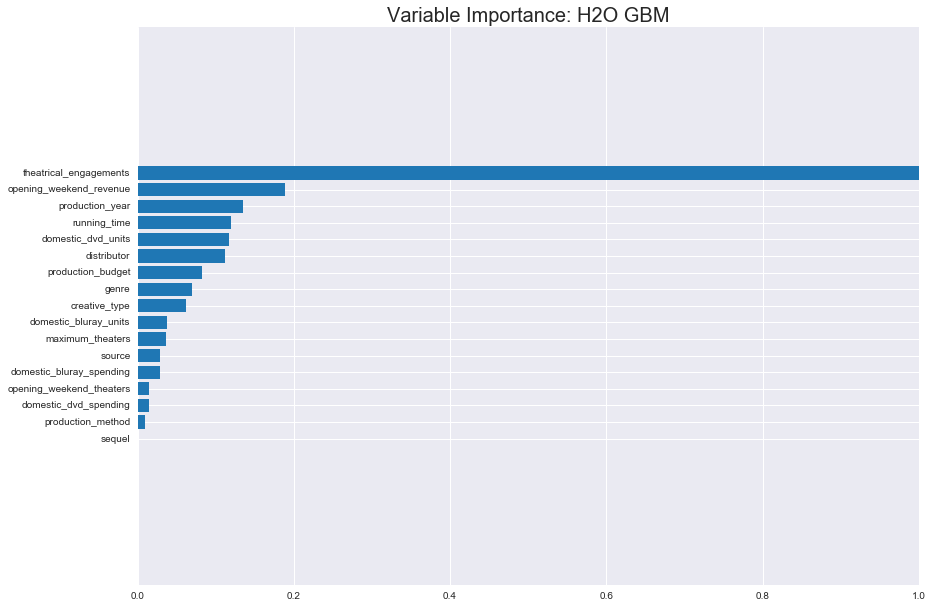

In [75]:
gbm_model.varimp_plot(num_of_features=27)

In [76]:
predictions = gbm_model.predict(test[:-1])

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [77]:
print(gbm_model.model_performance(test_data=test).r2())
print(gbm_model.model_performance(test_data=test).mse())

0.835693246158
3.13460191441e+15


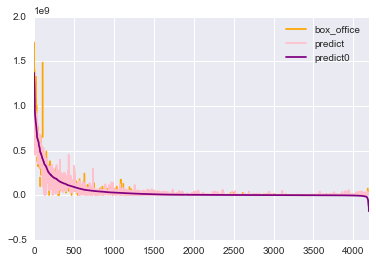

In [79]:
test=test.cbind(predictions)
test_df=test.as_data_frame()
result = test_df.sort_values(['predict0'],ascending=False)
result1 = result.reset_index(drop= True)

In [83]:
newdf

,box_office,predict,predict0
0,1.710912e+09,9.499110e+08,1.369385e+09
1,1.037120e+09,9.208914e+08,1.274508e+09
2,1.313830e+09,8.459627e+08,1.267725e+09
3,NaN,8.344660e+08,1.261873e+09
4,1.095627e+09,8.188704e+08,1.225730e+09
5,6.539968e+08,6.025613e+08,1.182507e+09
6,1.403907e+09,8.194057e+08,1.146730e+09
7,NaN,9.623924e+08,1.038750e+09
8,6.228030e+08,6.600947e+08,1.001374e+09
9,NaN,9.368426e+08,9.511521e+08


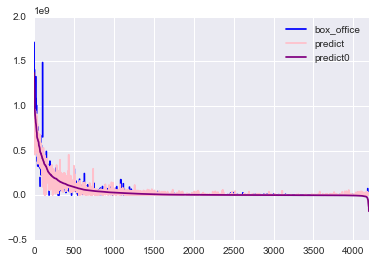

In [96]:
newdf.plot(color=['b','pink','purple'])

###### By using Random Forest model, we identified the top 5 important variables, which are: "genre", "num_voted_users", "num_user_for_reviews", "title_year" and "duration". 

In [50]:
# imports
import h2o 
import numpy as np
import pandas as pd
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [51]:
%matplotlib inline

In [52]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 hours 15 mins
H2O cluster version:,3.10.4.4
H2O cluster version age:,11 days
H2O cluster name:,H2O_from_python_yataolu_5depvx
H2O cluster total nodes:,1
H2O cluster free memory:,1.499 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [53]:
h2o.remove_all()                          #clean slate, in case cluster was already running

In [54]:
path = '/Users/yataolu/Desktop/datamining/movie_summary2.csv'

In [55]:
frame = h2o.import_file(path=path) # multi-threaded import

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [56]:
frame.describe()

Rows:13821
Cols:24




,odid,display_name,od_name,production_year,running_time,sequel,distributor,opening_weekend_revenue,opening_weekend_theaters,maximum_theaters,theatrical_engagements,domestic_dvd_units,domestic_dvd_spending,domestic_bluray_units,domestic_bluray_spending,creative_type,source,production_method,genre,production_budget,domestic_box_office,international_box_office,inflation_adjusted_domestic_box_office,box_office
type,int,string,string,int,int,int,enum,int,int,int,int,int,int,int,int,enum,enum,enum,enum,int,int,int,int,int
mins,10100.0,NaN,NaN,1902.0,0.0,0.0,,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,,,,,0.0,0.0,0.0,0.0,0.0
mean,140514717.611,NaN,NaN,2007.91852977,47.9310469575,0.0460892844223,,3842293.90153,523.754576369,584.570074524,3010.24708776,1036447.06631,3101414.38673,37044.7099342,797429.314304,,,,,10551964.3827,14249403.4378,18761885.1654,19537842.8023,21592259.2858
maxs,285390100.0,NaN,NaN,2017.0,980.0,1.0,,247966675.0,4468.0,4468.0,87202.0,22997252.0,541618013.0,7461601.0,161970182.0,,,,,425000000.0,936662225.0,2023411357.0,3926220158.0,4118064880.0
sigma,84441440.0694,NaN,NaN,8.3385504078,55.9030606639,0.209686059497,,12601252.0344,1079.70302838,1103.25172466,6563.91902527,1962374.57766,15940446.181,246060.230367,5443336.63691,,,,,28595299.9661,43671665.6042,69552157.1648,72358665.1282,99278911.8815
zeros,0,0,0,0,7544,13184,,3862,3869,2851,3042,0,11198,12071,12083,,,,,9740,2741,5779,2741,7579
missing,0,0,0,0,0,0,3319,0,0,0,0,11197,0,0,0,2357,2015,1712,1544,0,0,0,0,0
0,10100.0,Titanic,Titanic,1997.0,194.0,0.0,Paramount Pictures,28638131.0,2674.0,3265.0,87202.0,nan,0.0,0.0,0.0,Historical Fiction,Original Screenplay,Live Action,Thriller/Suspense,200000000.0,658672302.0,1548943366.0,1147349023.0,2696292389.0
1,20100.0,The Dark Knight,Dark Knight The,2008.0,152.0,1.0,Warner Bros.,158411483.0,4366.0,4366.0,39170.0,19555100.0,282361481.0,2615544.0,33598926.0,Super Hero,Based on Comic/Graphic Novel,Live Action,Action,185000000.0,533345358.0,469546000.0,626080555.0,1095626555.0
2,30100.0,Star Wars Ep. IV: A New Hope,Star Wars Ep IV A New Hope,1977.0,119.0,0.0,20th Century Fox,1554475.0,43.0,2375.0,43684.0,935568.0,25237983.0,200150.0,3411838.0,Science Fiction,Original Screenplay,Live Action,Adventure,11000000.0,460998007.0,325600000.0,1385311974.0,1710911974.0


In [57]:
# split into training, validation and test
train, test = frame.split_frame([0.7])

In [70]:
# assign target and inputs
y = 'box_office'
X = ['inflation_adjusted_domestic_box_office', 'theatrical_engagements','production_year','international_box_office','running_time']
print(y)
print(X)

box_office
['inflation_adjusted_domestic_box_office', 'theatrical_engagements', 'production_year', 'international_box_office', 'running_time']


In [71]:
# elastic net regularized regression 
#   - Gaussian family, i.e. squared loss, for linear regression
#   - L1 for variable selection
#   - L2 for handling multicollinearity
#   - IRLS for handling outliers
#   - with lamba parameter tuning for variable selection

# initialize
movie_glm = H2OGeneralizedLinearEstimator(family='gaussian',
                                         model_id='loan_glm1',
                                         solver='IRLSM',
                                         standardize=True,
                                         lambda_search=True)

# train 
movie_glm.train(X, y, training_frame=train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [72]:
movie_glm.coef()

{u'Intercept': 22044434.918922987,
 u'inflation_adjusted_domestic_box_office': 0.00013170043259028594,
 u'international_box_office': 8.095871699997349e-05,
 u'production_year': -326.06411069786884,
 u'running_time': 33.84169935295222,
 u'theatrical_engagements': 0.997577156666301}

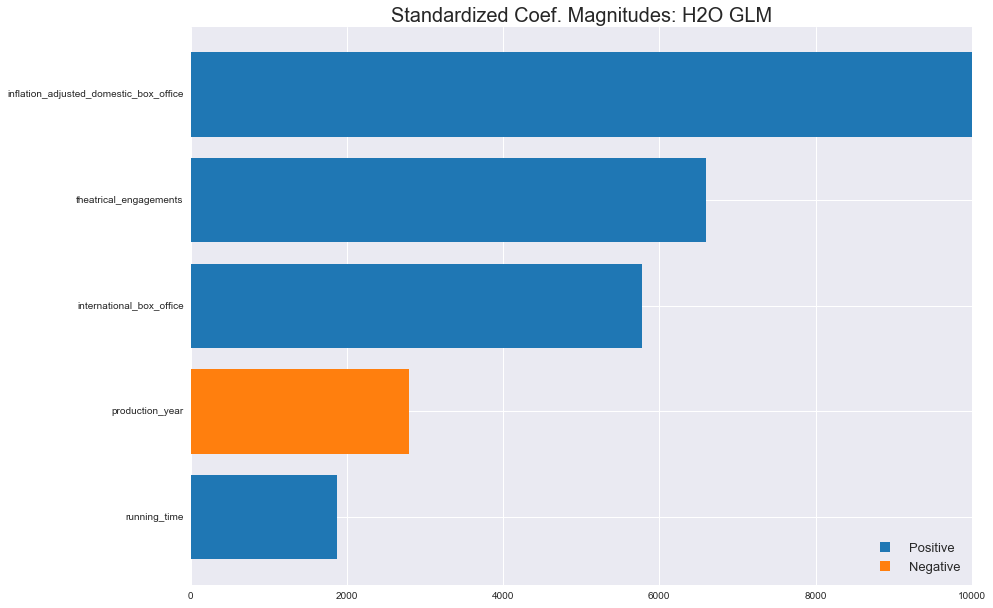

In [73]:
movie_glm.std_coef_plot(num_of_features=27)

In [74]:
# measure train and test MSE
print(movie_glm.mse(train=True))
print(movie_glm.model_performance(test_data=test).mse())
print(movie_glm.model_performance(test_data=test).r2())

1.04054788434e+16
8.54745383963e+15
0.000269908697509


In [ ]:
h2o.cluster().shutdown(prompt=False)